# **Import Libraries and Dataset**

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
#Show total columns and rows in the dataset
df=pd.read_csv(r"diamonds.csv")
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
#Result: No duplicate data
duplicate_rows = df.duplicated()

print(f"Number of duplicate rows: {duplicate_rows.sum()}")

print("Duplicate Rows in the Dataset:")
print(df[duplicate_rows])


Number of duplicate rows: 0
Duplicate Rows in the Dataset:
Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


# **Data Visualization**

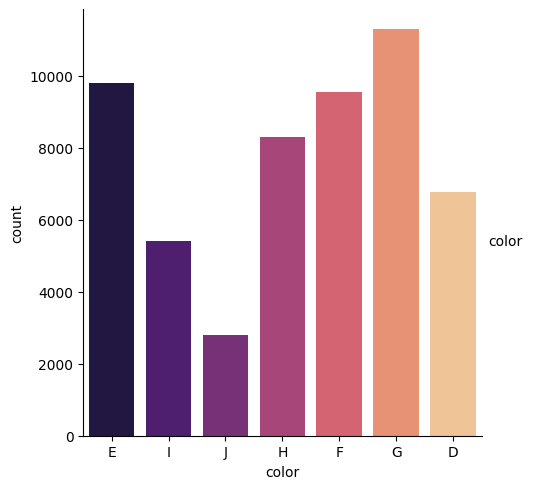

In [7]:
sns.catplot(data=df, x='color', hue='color', kind='count',palette='magma')

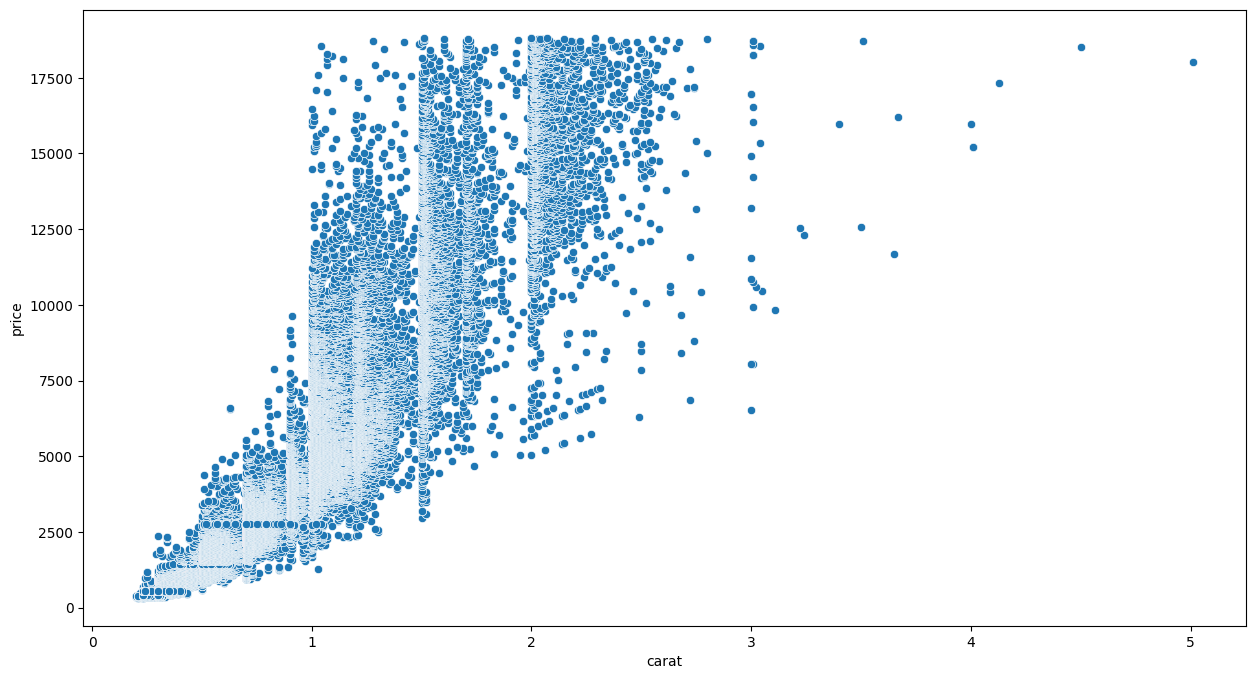

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='carat',y='price')
plt.show()

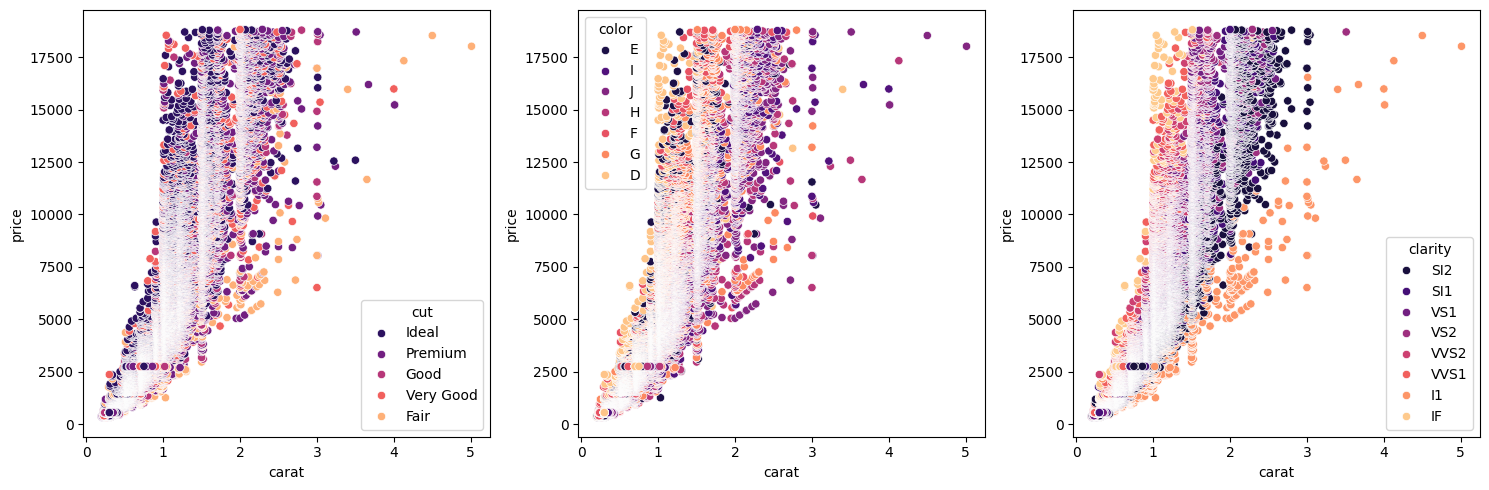

In [9]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=df,x='carat',y='price',hue='cut',palette='magma',ax=axs[0])
sns.scatterplot(data=df,x='carat',y='price',hue='color',palette='magma',ax=axs[1])
sns.scatterplot(data=df,x='carat',y='price',hue='clarity',palette='magma',ax=axs[2])
plt.tight_layout()
plt.show()

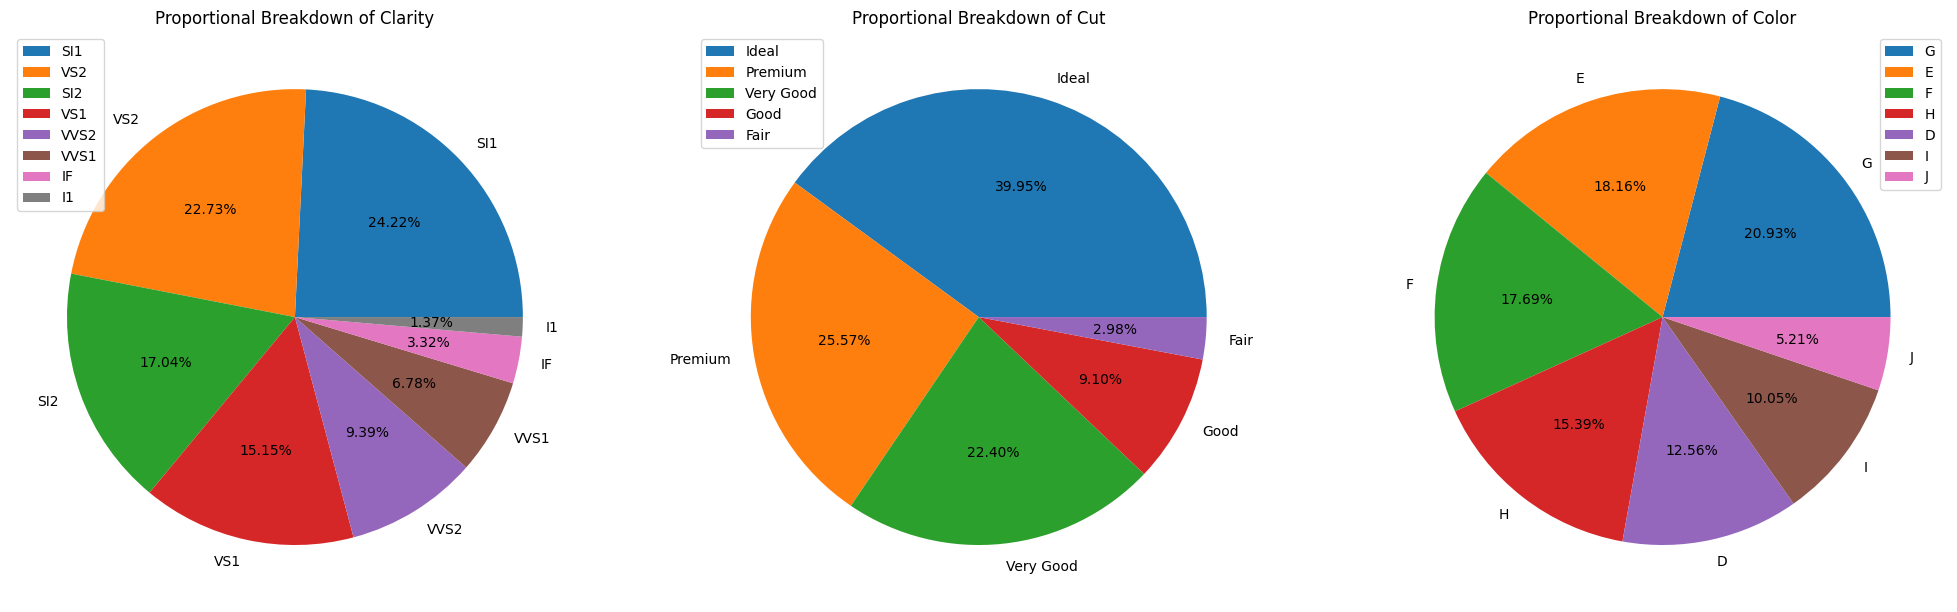

In [10]:
k=df['clarity'].value_counts().reset_index()
k.columns=(['clarity','count'])
k1=df['cut'].value_counts().reset_index()
k1.columns=(['cut','count'])
k2=df['color'].value_counts().reset_index()
k2.columns=(['color','count'])
ax,fig=plt.subplots(1,3,figsize=(25,20))
fig[0].pie(x=k['count'],labels=k['clarity'],autopct='%.2f%%')
fig[0].set_title("Proportional Breakdown of Clarity")
fig[0].legend(k['clarity'])
fig[1].pie(x=k1['count'],labels=k1['cut'],autopct='%.2f%%')
fig[1].set_title("Proportional Breakdown of Cut")
fig[1].legend(k1['cut'])
fig[2].pie(x=k2['count'],labels=k2['color'],autopct='%.2f%%')
fig[2].set_title("Proportional Breakdown of Color")
fig[2].legend(k2['color'])
plt.show()

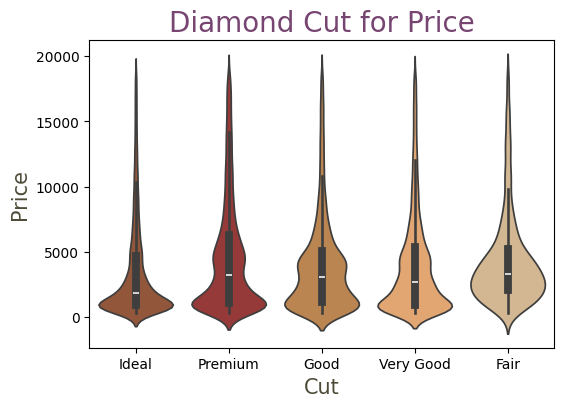

In [11]:
plt.figure(figsize=(6,4))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

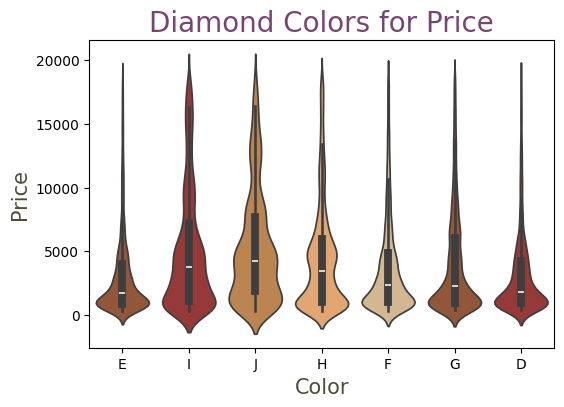

In [12]:
plt.figure(figsize=(6,4))
ax = sns.violinplot(x="color",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

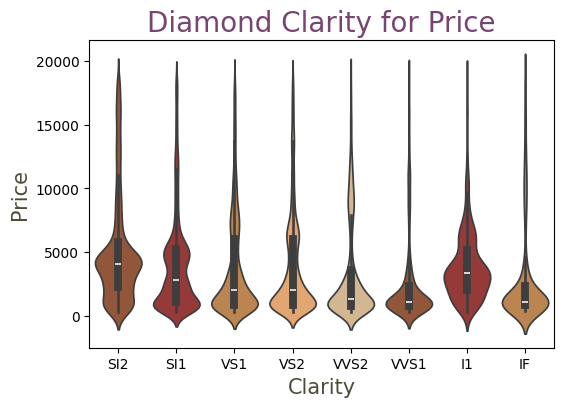

In [13]:
plt.figure(figsize=(6,4))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

# **Descriptive Statistics**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


# **Check on Outliers**

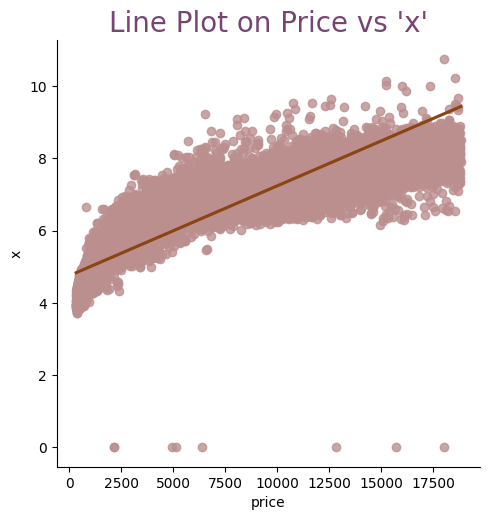

In [15]:
lm = sns.lmplot(x="price", y="x", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)
plt.show()

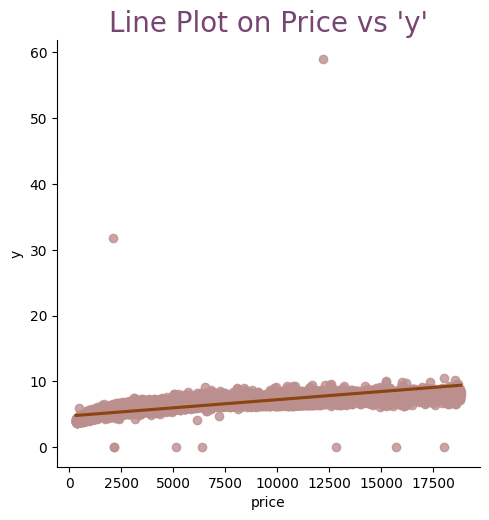

In [13]:
lm = sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

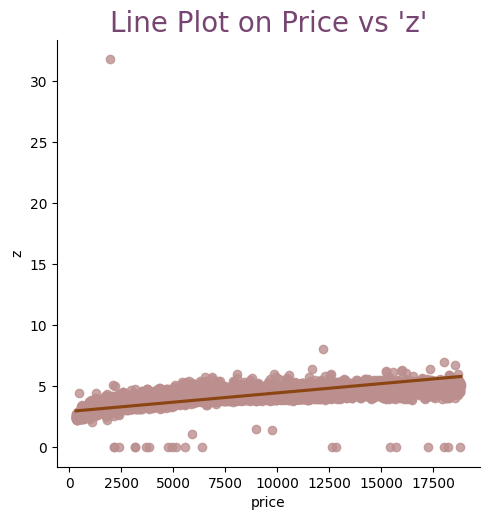

In [14]:
lm = sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

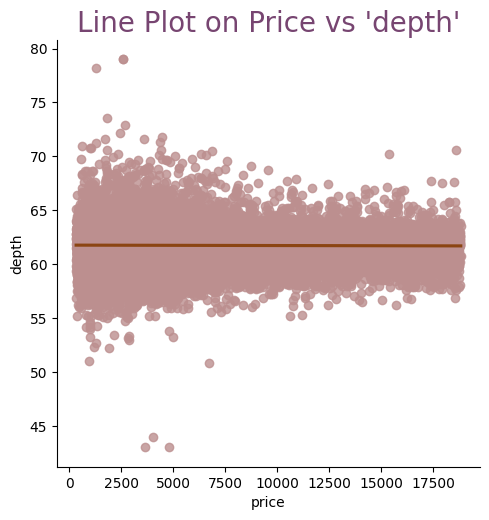

In [15]:
lm = sns.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

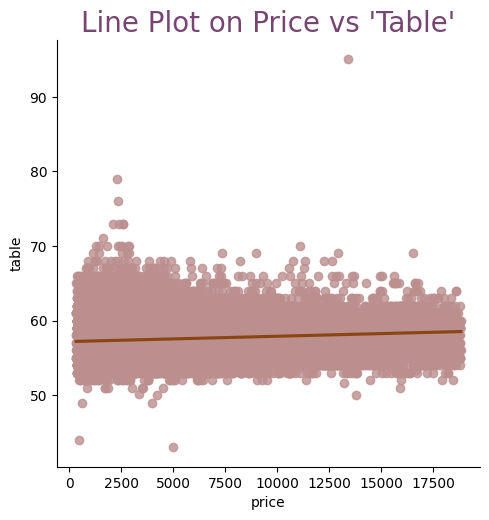

In [16]:
lm = sns.lmplot(x="price", y="table", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

# **Data Preprocessing**

## _Data Cleaning_

In [16]:
#Drop the 'Unnamed' column
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(53940, 10)

In [17]:
#Drop datapoints in column x, y, z that is having minimum of 0
#Result: Removed 20 datapoints
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

## _Remove Outliers_

In [18]:
#Result: Removed 11 datapoints
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<40)]
df = df[(df["y"]<40)]
df = df[(df["z"]<40)&(df["z"]>2)]
df.shape

(53909, 10)

## _Encode Categorical Columns into Numerical Data_

In [19]:
encoded_data = df.copy()

#Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
encoded_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


<Axes: >

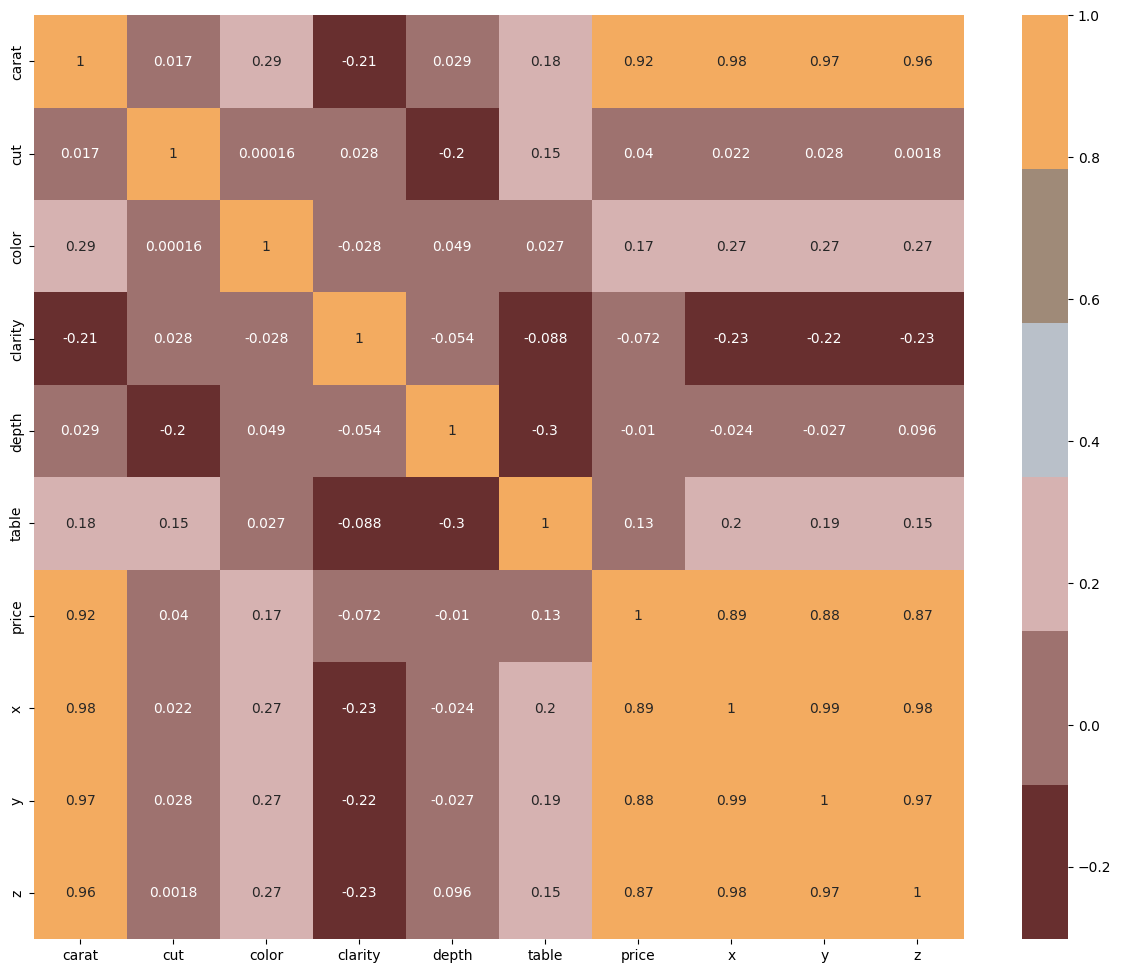

In [23]:
#Correlation Matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= encoded_data.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

# **Linear Regression**

## *No Gradient Descent*

Linear Regression Model
R² on Training Set: 0.8841
R² on Test Set: 0.8918
Mean Squared Error on Train Set: 1835303.8675
Mean Squared Error on Test Set: 1743751.9798


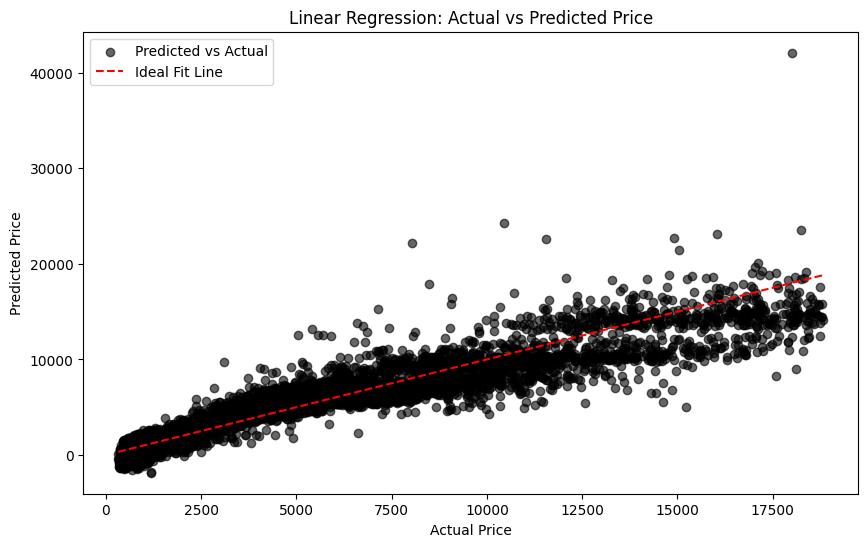

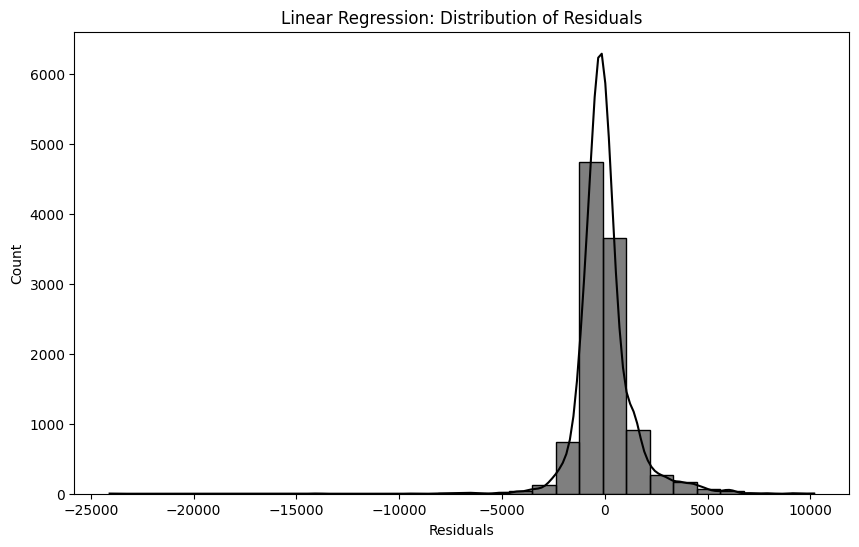

In [27]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare the data
X = encoded_data.drop(columns='price')
y = encoded_data['price']

#Split Training Set: 80%, Test Set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

#Use Standard Scaler to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Predictions on train and test data
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

#Performance metrics (R2 and MSE)
print(f"Linear Regression Model")
print(f"R² on Training Set: {r2_score(y_train, train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, test_pred):.4f}")

#Test set visualization (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6, color='black', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization (Difference between Actual and Predicted)
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='black')
plt.xlabel('Residuals')
plt.title('Linear Regression: Distribution of Residuals')
plt.show()


## *With Gradient Descent*

Linear Regression Model with Gradient Descent
R² on Training Set: 0.8841
R² on Test Set: 0.8917
Mean Squared Error on Train Set: 1835967.6274
Mean Squared Error on Test Set: 1745239.3353


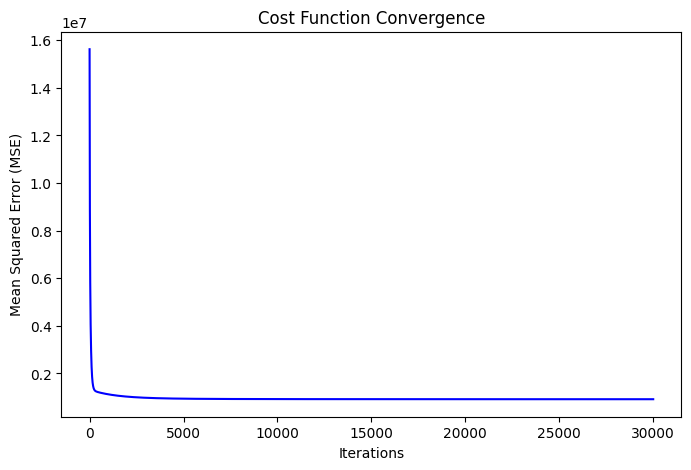

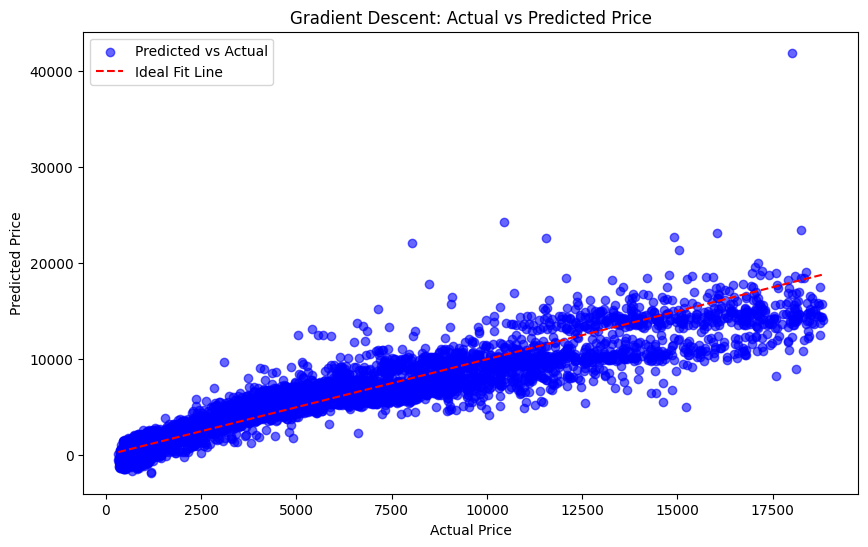

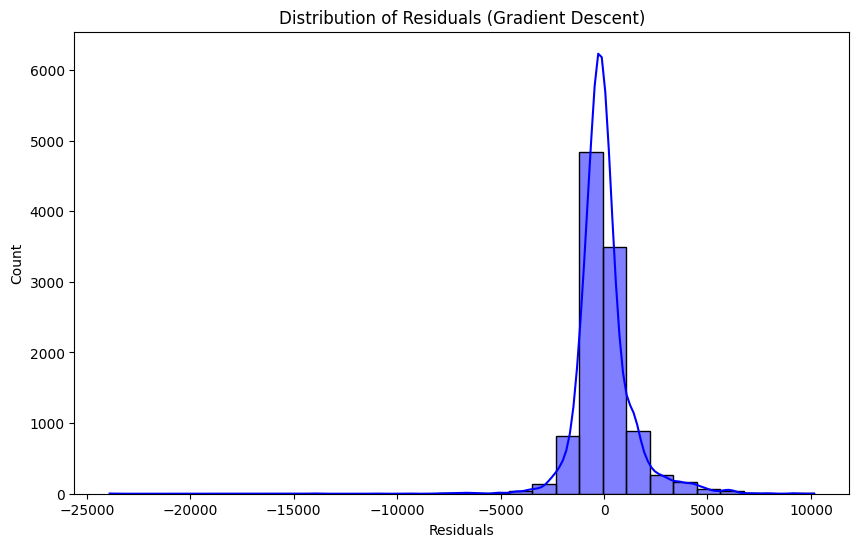

In [23]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

#Prepare the data
X = encoded_data.drop(columns='price')
y = encoded_data['price']

#Split Training Set: 80%, Test Set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

#Use Standard Scaler to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Add a column for the b-intercept (y=wx+b)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

#Gradient Descent Implementation Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    #Number of samples
    m = len(y)
    #Number of features
    n = X.shape[1]
    #Initialize the weights to 0 for each iterations
    weights = np.zeros(n)
    
    #Create array to store MSE of each iterations
    cost_history = []

    #Perform gradient descent iterations
    for i in range(iterations):
        #Calculate predictions using current weights
        predictions = X.dot(weights)
        
        #Compute the residuals errors
        errors = predictions - y
        
        #Calculate gradient
        gradients = (1/m) * X.T.dot(errors)
        
        #Update the weights
        weights -= learning_rate * gradients
        
        #Calculate Mean Squared Error (MSE) and compute into cost_history
        mse = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(mse)

    return weights, cost_history

#Hyperparameters for gradient descent
learning_rate = 0.01
iterations = 30000

#Gradient descent to get the weights
weights, cost_history = gradient_descent(X_train_scaled, y_train, learning_rate, iterations)

#Predictions on train and test data using optimized weights
train_pred = X_train_scaled.dot(weights)
test_pred = X_test_scaled.dot(weights)

#Performance metrics (R2 and MSE)
print(f"Linear Regression Model with Gradient Descent")
print(f"R² on Training Set: {r2_score(y_train, train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, test_pred):.4f}")

#Cost function convergence visualization
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, color='b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cost Function Convergence')
plt.show()

#Test set visualization (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Descent: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization (Difference between Actual and Predicted)
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Gradient Descent)')
plt.show()


## *With Regularization*

Linear Regression Model with Ridge Regularization
R² on Training Set: 0.8841
R² on Test Set: 0.8918
Mean Squared Error on Train Set: 1835304.6768
Mean Squared Error on Test Set: 1743777.1421

Linear Regression Model with Lasso Regularization
R² on Training Set: 0.8841
R² on Test Set: 0.8918
Mean Squared Error on Train Set: 1835303.9039
Mean Squared Error on Test Set: 1743763.5676


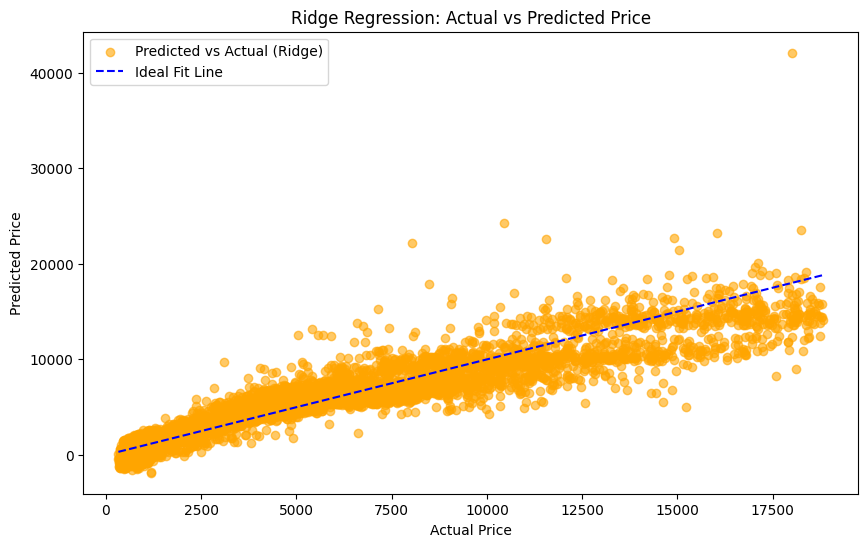

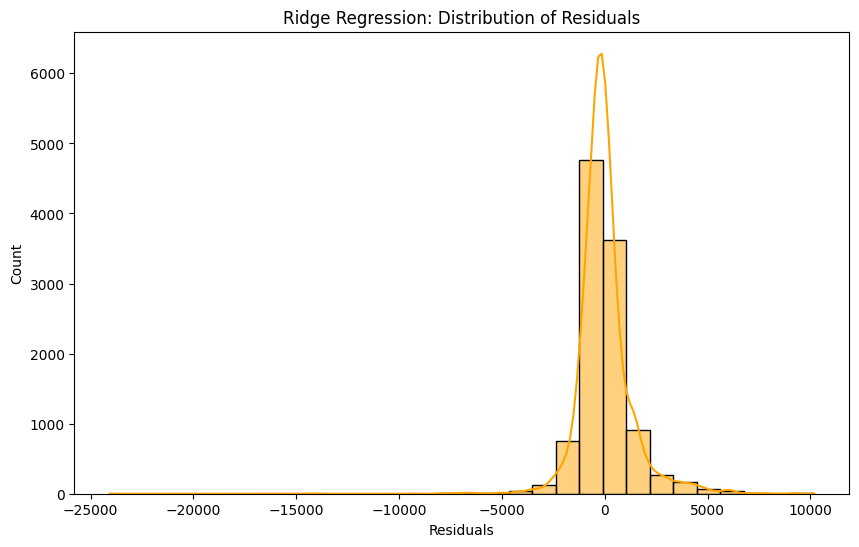

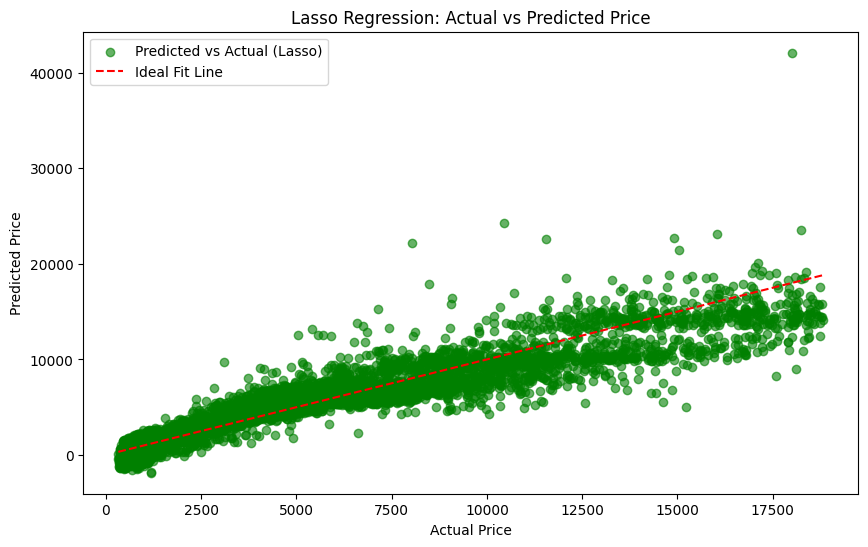

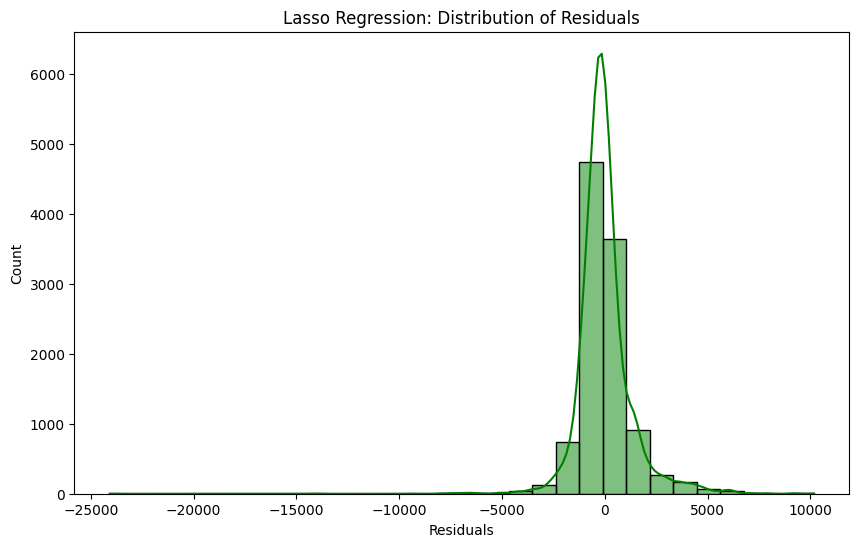

In [24]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare the data
X = encoded_data.drop(columns='price')
y = encoded_data['price']

#Split Training Set: 80%, Test Set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

#Use Standard Scaler to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize and train the Ridge and Lasso Regression models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01)

#Train Ridge Regression model
ridge_model.fit(X_train_scaled, y_train)

#Train Lasso Regression model
lasso_model.fit(X_train_scaled, y_train)

#Predictions on train and test data
ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

lasso_train_pred = lasso_model.predict(X_train_scaled)
lasso_test_pred = lasso_model.predict(X_test_scaled)

#Performance metrics (R2 and MSE)
print(f"Linear Regression Model with Ridge Regularization")
print(f"R² on Training Set: {r2_score(y_train, ridge_train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, ridge_test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, ridge_train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, ridge_test_pred):.4f}")
print(f"")

# Step 6: Print the performance metrics for Lasso
print(f"Linear Regression Model with Lasso Regularization")
print(f"R² on Training Set: {r2_score(y_train, lasso_train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, lasso_test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, lasso_train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, lasso_test_pred):.4f}")

#Test set visualization for Ridge Regression (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_test_pred, alpha=0.6, color='orange', label='Predicted vs Actual (Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization for Ridge Regression (Difference between Actual and Predicted)
ridge_residuals = y_test - ridge_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(ridge_residuals, bins=30, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Ridge Regression: Distribution of Residuals')
plt.show()

#Test set visualization for Lasso Regression (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_test_pred, alpha=0.6, color='g', label='Predicted vs Actual (Lasso)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization for Lasso Regression (Difference between Actual and Predicted)
lasso_residuals = y_test - lasso_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(lasso_residuals, bins=30, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Lasso Regression: Distribution of Residuals')
plt.show()


# **XGBoost Regression**

## *No Regularization*

XGBoost Regression Model
R² on Training Set: 0.9864
R² on Test Set: 0.9828
Mean Squared Error on Train Set: 216221.4584
Mean Squared Error on Test Set: 276683.3640


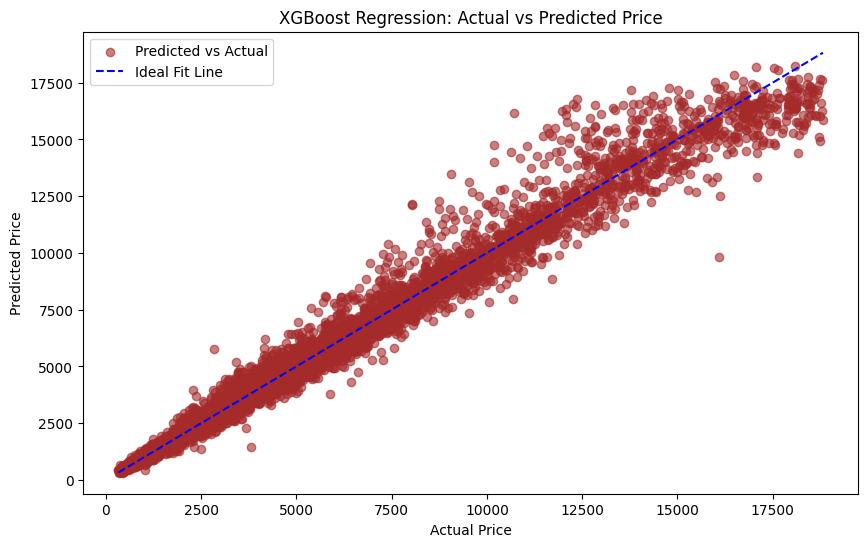

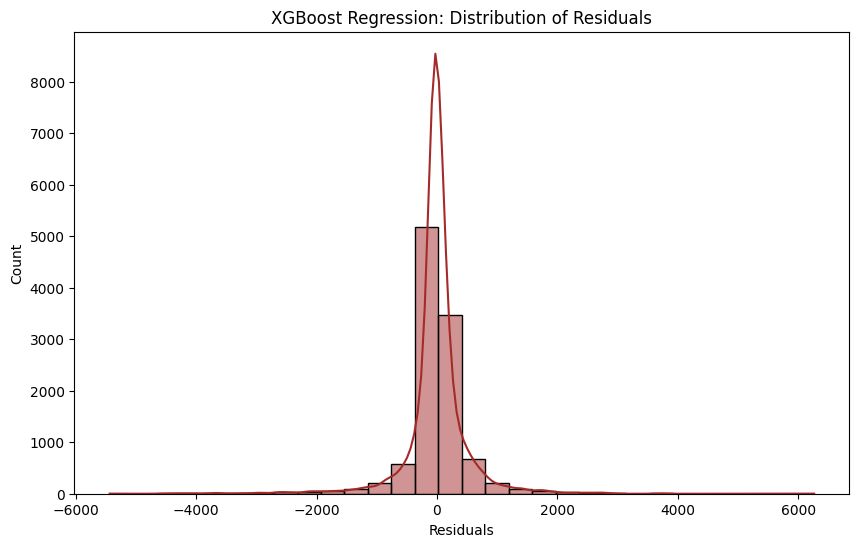

In [25]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

#Prepare the data
X = encoded_data.drop(columns='price')
y = encoded_data['price']

#Split Training Set: 80%, Test Set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

#Use Standard Scaler to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    #Specify as 100 boosting rounds
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=25
)
#Train XGBoost model with scaled training data
xgb_model.fit(X_train_scaled, y_train)

#Predictions on train and test data
train_pred = xgb_model.predict(X_train_scaled)
test_pred = xgb_model.predict(X_test_scaled)

#Performance metrics (R2 and MSE)
print(f"XGBoost Regression Model")
print(f"R² on Training Set: {r2_score(y_train, train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, test_pred):.4f}")

#Test set visualization (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6, color='brown', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization (Difference between Actual and Predicted)
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='brown')
plt.xlabel('Residuals')
plt.title('XGBoost Regression: Distribution of Residuals')
plt.show()


## *With Regularization*

XGBoost Regression with Regularization Model
R² on Training Set: 0.9863
R² on Test Set: 0.9828
Mean Squared Error on Train Set: 216940.1258
Mean Squared Error on Test Set: 276900.3456


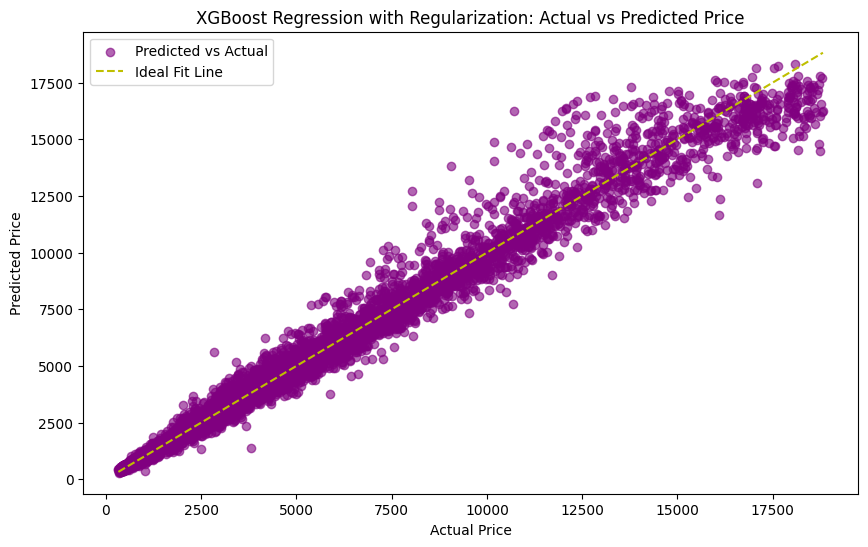

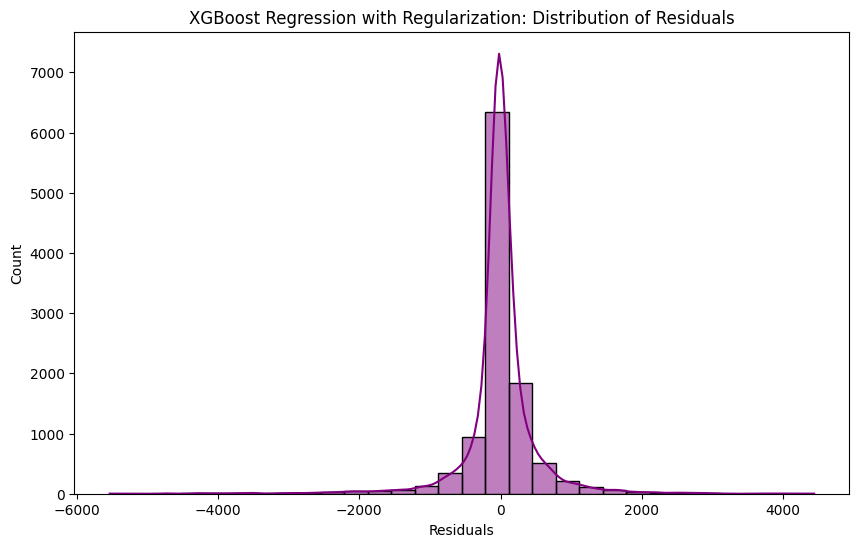

In [26]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

#Prepare X and Y data
X = encoded_data.drop(columns='price')
y = encoded_data['price']

#Split Training Set: 80%, Test Set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

#Use Standard Scaler to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train XGB Regressor with Regularization
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    #Specify as 100 boosting rounds
    n_estimators=100,
    learning_rate=0.1,
    random_state=25,
    #Level 1 Regularization on weights (Default: 0)
    reg_alpha=0.5,
    #Level 2 Regularization on weights (Default: 1)
    reg_lambda=0.5
)
#Train XGBoost model with scaled training data
xgb_model.fit(X_train_scaled, y_train)

#Predictions on train and test data
train_pred = xgb_model.predict(X_train_scaled)
test_pred = xgb_model.predict(X_test_scaled)

#Performance metrics (R2 and MSE)
print(f"XGBoost Regression with Regularization Model")
print(f"R² on Training Set: {r2_score(y_train, train_pred):.4f}")
print(f"R² on Test Set: {r2_score(y_test, test_pred):.4f}")
print(f"Mean Squared Error on Train Set: {mean_squared_error(y_train, train_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, test_pred):.4f}")

#Test set visualization (Predicted over Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y--', label='Ideal Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Regression with Regularization: Actual vs Predicted Price')
plt.legend()
plt.show()

#Residuals visualization (Difference between Actual and Predicted)
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('XGBoost Regression with Regularization: Distribution of Residuals')
plt.show()
